In [1]:
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import math


In [62]:
class calculate_miu_s(object):
    
    def __init__(self, h, y, time_index):
        self.h = h
        self.y = y
        self.time = time_index
        return None
    
    def transmittance(self, d, t, c, g, miu_a, miu_s):
        miu_s_prime = (1-g)*miu_s
        Z0 = 1/(miu_s_prime)
        D = 1/(3*(miu_a + miu_s_prime))
        h1 = math.pow(4*math.pi*D*c, -0.5)
        h2 = math.pow(t, -1.5)*math.exp(-miu_a*c*t)
        h3 = (d-Z0)*math.exp(-(math.pow(d-Z0, 2))/(4*D*c*t))
        h4 = (d+Z0)*math.exp(-(math.pow(d+Z0, 2))/(4*D*c*t))
        h5 = (3*d-Z0)*math.exp(-(math.pow(3*d-Z0, 2))/(4*D*c*t))
        h6 = (3*d+Z0)*math.exp(-(math.pow(3*d+Z0, 2))/(4*D*c*t))
    #     return d,Z0,D,c,t
        return h1*h2*(h3-h4+h5-h6)
    
    
    def error_cal(self, x):
        miu_s = x[0]
        miu_a = x[1]  
        # miu_a = 0.01e2
        g = 0.7
        d = 0.01
        # t = 300e-12
        c = 3e8/1.3314
        T = int(480)
#         time = np.array(range(1,T, 1))
#         time = time*1e-8*0.010345058455114822
        time = self.time*1e-9
        miu_s = miu_s*1e4
        intensity1 = np.zeros((T, ), dtype = float)
        for i in range(time.shape[0] - 1):

            intensity1[i] = calculate_miu_s.transmittance(self, d, time[i], c, g, miu_a, miu_s)
        
        y2 = np.convolve(intensity1, self.h)
        self.intensity = intensity1
        self.y_convolved = y2
        y2 = y2/max(y2)
        return np.sum(abs(y2 - self.y))
#         return time

    def get_convolved_signal(self):
        return self.y_convolved
        
    def get_x(self):
        return self.intensity

In [3]:

def transmittance(d, t, c, Z0, D, miu_a):
    h1 = math.pow(4*math.pi*D*c, -0.5)
    h2 = math.pow(t, -1.5)*math.exp(-miu_a*c*t)
    h3 = (d-Z0)*math.exp(-(math.pow(d-Z0, 2))/(4*D*c*t))
    h4 = (d+Z0)*math.exp(-(math.pow(d+Z0, 2))/(4*D*c*t))
    h5 = (3*d-Z0)*math.exp(-(math.pow(3*d-Z0, 2))/(4*D*c*t))
    h6 = (3*d+Z0)*math.exp(-(math.pow(3*d+Z0, 2))/(4*D*c*t))
#     return d,Z0,D,c,t
    return h1*h2*(h3-h4+h5-h6)

In [4]:
miu_a = 0.01e2
miu_s = 1e5 # miu_s should >=10e2
g = 0.7
miu_s_prime = (1-g)*miu_s
d = 0.01
# t = 300e-12
c = 3e8/1.3314
Z0 = 1/(miu_s_prime)
D = 1/(3*(miu_a + miu_s_prime))

In [5]:
T = int(480)
time = np.array(range(1,T, 1))
time = time*1e-8*0.010345058455114822
batch = 1

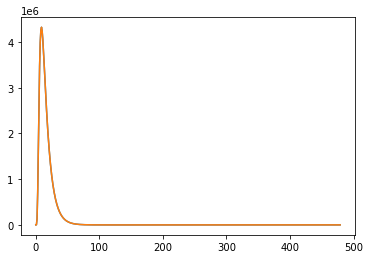

In [6]:
miu_s_series = np.array([0.3])*1e5
intensity1 = np.zeros((T, batch), dtype = float)
for j in range(0, batch):
    miu_a = 0.01e2
    miu_s = miu_s_series[j] # miu_s should >=10e2
    g = 0.7
    miu_s_prime = (1-g)*miu_s
    d = 0.01
    # t = 300e-12
    c = 3e8/1.3314
    Z0 = 1/(miu_s_prime)
    D = 1/(3*(miu_a + miu_s_prime))
    for i in range(time.shape[0] - 1):
        
        intensity1[i, j] = transmittance(d, time[i], c, Z0, D, miu_a)
    
plt.plot(intensity1)
for j in range(0, batch):
    plt.plot(intensity1[:, j])
plt.show()


In [8]:
s0 = process_hyperspec('ref_real_5ns.txt', 0)

In [9]:
s0.read_data()
h = s0.cal_846nm()
dataframe0 = s0.return_dataframe()
x = np.convolve(intensity1[:, 0], h)

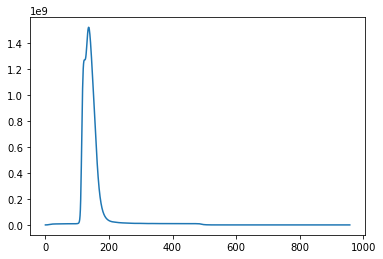

In [10]:
plt.plot(x)
plt.show()

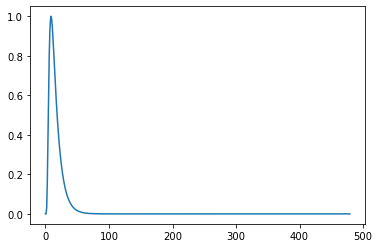

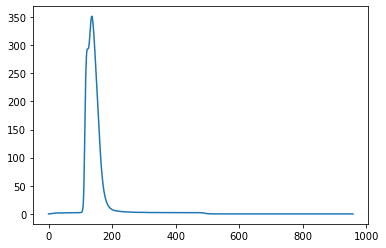

0.146875

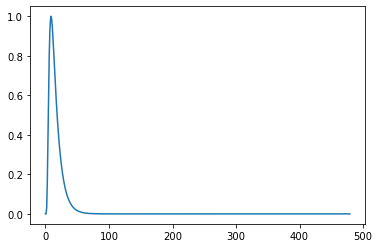

(Matrix([
 [1, 0, 0, 2],
 [0, 1, 0, 0],
 [0, 0, 1, 1],
 [0, 0, 0, 0],
 [0, 0, 0, 0]]), (0, 1, 2))

(array([[-0.60485091,  0.63968685, -0.45472441, -0.11906995, -0.06327847],
        [-0.48350678,  0.13826764,  0.83764474, -0.10005204,  0.18826613],
        [-0.57550707, -0.55300248, -0.13238325,  0.55731394, -0.18669686],
        [-0.24034086, -0.47879981, -0.11396056, -0.81447176, -0.19140466],
        [-0.10679162, -0.1913682 , -0.24711267, -0.04299829,  0.94289991]]),
 array([1.03057316e+01, 3.48991019e+00, 2.36905549e+00, 2.75186313e-16]),
 array([[-3.25748186e-01, -2.75756779e-01, -2.24534721e-01,
         -8.76031094e-01],
        [ 4.70669235e-01, -3.35252712e-01, -8.04598144e-01,
          1.36740327e-01],
        [ 7.54448363e-02,  9.00868369e-01, -3.68156650e-01,
         -2.17266978e-01],
        [ 8.16496581e-01, -1.15814445e-16,  4.08248290e-01,
         -4.08248290e-01]]))

In [38]:
a3 = np.concatenate((c,d),axis = 1)
a3_svd  = np.linalg.svd(np.array(a3))
a3_svd

(array([[-0.6072903 ,  0.65311369, -0.4326018 , -0.06689316, -0.11411399],
        [-0.48012659,  0.10686536,  0.83938827, -0.20587855,  0.10535467],
        [-0.57880104, -0.54704891, -0.13937174,  0.57082463,  0.14304403],
        [-0.23209754, -0.47010909, -0.13179163, -0.56092803, -0.62699194],
        [-0.10861417, -0.20434589, -0.26737521, -0.55915858,  0.74986525]]),
 array([10.29510215,  3.55608193,  2.45389505,  0.05959968]),
 array([[-0.33235747, -0.28518145, -0.22535705, -0.87030124],
        [ 0.47561734, -0.3620921 , -0.78911157,  0.141352  ],
        [ 0.08082629,  0.8874183 , -0.39765808, -0.21868682],
        [-0.81042814, -0.00704364, -0.41034764,  0.41805674]]))

In [40]:
U = a3_svd[0]
SIGMA = np.zeros((5,4))
SIGMA[0:4,0:4] = np.diag(a3_svd[1])
V = a3_svd[2]

In [41]:
np.matmul(np.matmul(U,SIGMA), V)

array([[ 3.10000000e+00,  8.88178420e-16,  1.33226763e-15,
         6.00000000e+00],
       [ 2.00000000e+00,  3.10000000e+00, -5.55111512e-17,
         3.90000000e+00],
       [ 1.00000000e+00,  2.10000000e+00,  3.00000000e+00,
         5.00000000e+00],
       [ 5.55111512e-16,  1.00000000e+00,  2.00000000e+00,
         1.90000000e+00],
       [ 2.77555756e-16,  1.66533454e-16,  1.10000000e+00,
         1.00000000e+00]])

In [42]:
n1 = np.matmul(np.matmul(U[0:3,:],SIGMA), V)
n1

array([[ 3.10000000e+00,  8.88178420e-16,  1.33226763e-15,
         6.00000000e+00],
       [ 2.00000000e+00,  3.10000000e+00, -5.55111512e-17,
         3.90000000e+00],
       [ 1.00000000e+00,  2.10000000e+00,  3.00000000e+00,
         5.00000000e+00]])

In [43]:
n2 = syp.Matrix(n1)

In [44]:
n2.rref()

(Matrix([
 [1, 0, 0,    1.93548387096774],
 [0, 1, 0, 0.00936524453694097],
 [0, 0, 1,    1.01494970516823]]), (0, 1, 2))

In [48]:
syp.Matrix(a3[2:5,:]).rref()

(Matrix([
 [  1,   0, 0,   2.10090909090909],
 [  0,   1, 0, 0.0818181818181817],
 [0.0, 0.0, 1,  0.909090909090909]]), (0, 1, 2))